# Perceptron

The Perceptron algorithm is the simplest type of artificial neural network. We will classify data from the iris data set. The task is to predict the species of flower based off of measurements of sepeal length and width. This task is often referred to as the ''Hello World'' of machine learning.


|![MNIST Dataset](img/iris_with_labels.jpg) |
|:--:| 
|*Iris Flower*|

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pd.set_option('display.max_rows', None)

data = pd.read_csv("iris.csv")
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


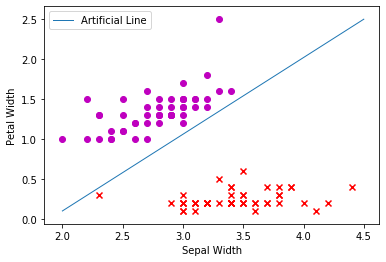

In [3]:
"""
    Plotting our data with a Artificial Line to check if its
        linearly seperable data.
    X - sepal width and petal width
    Y - numeric values for Setosa(1) and Versicolor(-1)
"""
# We save entry 2 and 4 from the data set
X = [np.array([data['sepal.width'][i], data['petal.width'][i]]) for i in range(101)]

# Convert the species label to a numeric values
make_int = lambda label: 1 if label == 'Setosa' else -1
Y = [make_int(data['variety'][i]) for i in range(101)]

plt.figure()
plt.plot([2.0,4.5], [0.1,2.5], linewidth = 1, label = "Artificial Line")
for index, x in enumerate(X):
    if Y[index] == -1:
        plt.scatter(x[0], x[1], c = 'm', marker = 'o')
    else:
        plt.scatter(x[0], x[1], c = 'r', marker = 'x')
        
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend(loc = "upper left")

plt.show()

In [4]:
"""
    Defining Sign/Step activation function
"""

def sign_activation(z, d):
    if z @ d < 0:
        return -1
    else:
        return 1

In [44]:
"""
    Defining Perceptron Training algorithm
"""

def PLA(input_data, input_labels, iterations = 1000):
    """ Perceptron Learning Algorithm.
    
    Keyword arguments:
        input_data   -- list of real valued data points stored as numpy arrays
        input_labels -- list of elements from {1, -1} 
        iterations   -- number of iterations of the perceptron update rule (default 1000)
        
    Output:
        weights      -- three dimensional weight vector stored as a numpy array 
    
    """
    
    weights = np.random.rand(2)
    number_of_data_entries = len(input_labels)
    
    for _ in range(iterations):
        i = np.random.randint(number_of_data_entries)
        if sign_activation(weights, input_data[i]) != input_labels[i]:
            weights += input_labels[i]*input_data[i]
    
    return weights

In [45]:
"""
    Iterating our Data/training to get optimal weights
"""

w = PLA(X, Y, 1000)

In [46]:
def predict(w, i):
    if sign_activation(w, X[i]) == 1:
        return 'Setosa'
    else:
        return 'Versicolor'


In [47]:
predict(w, 10)

'Setosa'

In [48]:
predict(w, 50)

'Versicolor'

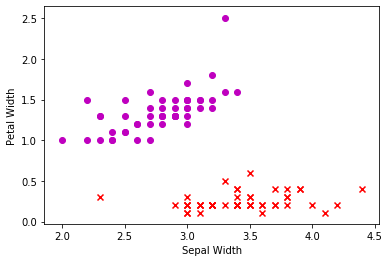

In [49]:
"""
   Using prediction to graph points.
"""


plt.figure()
for index, x in enumerate(X):
    out = predict(w, Y[index])
    if out == 'Versicolor':
        plt.scatter(x[0], x[1], c = 'm', marker = 'o')
    else:
        plt.scatter(x[0], x[1], c = 'r', marker = 'x')
        
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")

plt.show()

### References

#### 1. https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/
#### 2. https://towardsdatascience.com/perceptron-and-its-implementation-in-python-f87d6c7aa428